In [ ]:
import os
import pickle
import random
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import networkx  as nx
from copy import deepcopy
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from collections import OrderedDict
from sklearn.decomposition import PCA
import synthetic_data_generator as sdg
from sklearn.preprocessing import OneHotEncoder

np.set_printoptions(suppress=True, linewidth=120, precision=2)

# Clusters Specification and Experimental settings

### Generate the Attributed Network with afromention setting and Quantatitive features

In [2]:
# NUM_Repeats = 10
# size = (200, 5, 5) 
# N, V, K = size[0], size[1], size[2]

# pr_wtn = set([0.7, 0.9,])  # p in the paper
# pr_btw = set([0.3, 0.6,])  # q in the paper
# pr_v   = set([0.7, 0.9,])  # \epsilon OR \alpha in the paper 
# settings_quant = list(itertools.product(pr_wtn, pr_btw, pr_v))
# print("pr_wtn", "pr_bwn", "pr_v")
# for l in settings_quant:
#     print(l)



# name = 'S'
# data = {}  

# repeats = list(range(NUM_Repeats))

# features_type = 'Q'

# for setting in settings_quant:
#     data[setting] = {}
#     for repeat in repeats:
        
#         cardinality = sdg.clusters_cardinality(N=N, K=K)  # cluster cardinalities
#         data[setting][repeat] = {}
        
#         Y, Yn = sdg.generate_Y(N=N, V=V, K=K, pr_v=setting[-1],
#                                cardinality=cardinality, 
#                                features_type=features_type,
#                                V_noise1= int(np.floor(V/2))
#                               )
        
#         P = sdg.generate_P(N=N, 
#                            cardinality=cardinality,
#                            p_wth=setting[0],
#                            p_btw=setting[1],
#                           )
        
#         data[setting][repeat]['Y']  = Y
#         data[setting][repeat]['Yn'] = Yn  # with noise
#         data[setting][repeat]['P']  = P
#         data[setting][repeat]['GT'] = cardinality  # Ground Truth

        
# with open (os.path.join('SANC_computation', name+features_type+str(size)+'.pickle'), 'wb') as fp:
#     pickle.dump(data, fp)

### Generate the Attributed Network with afromention setting and Categorical features

In [3]:
NUM_Repeats = 10
size = (200, 5, 5) 
N, V, K = size[0], size[1], size[2]

pr_wtn = set([0.7, 0.9,])  # p in the paper
pr_btw = set([0.3, 0.6,])  # q in the paper
pr_v   = set([0.7, 0.9,])  # \epsilon OR \alpha in the paper 
settings_quant = list(itertools.product(pr_wtn, pr_btw, pr_v))
print("pr_wtn", "pr_bwn", "pr_v")
for l in settings_quant:
    print(l)


name = 'S' 
data = {}  

repeats = list(range(NUM_Repeats))

features_type = 'C'

for setting in settings_quant:
    data[setting] = {}
    for repeat in repeats:
        
        cardinality = sdg.clusters_cardinality(N=N, K=K)  # cluster cardinalities
        
        data[setting][repeat] = {}
        
        Y, Yn = sdg.generate_Y(N=N, V=V, K=K, pr_v=setting[-1],
                               cardinality=cardinality, 
                               features_type=features_type,
                               V_noise1=int(np.ceil(V/2))
                              )
        
        P = sdg.generate_P(N=N,
                            cardinality=cardinality,
                            p_wth=setting[0],
                            p_btw=setting[1],
                           )
        
        data[setting][repeat]['Y']  = Y
        data[setting][repeat]['Yn'] = Yn  # with noise
        data[setting][repeat]['P']  = P
        data[setting][repeat]['GT'] = cardinality  # Ground Truth

# with open (os.path.join('../data', name+features_type+str(size)+'.pickle'), 'wb') as fp:
#     pickle.dump(data, fp)

pr_wtn pr_bwn pr_v
(0.7, 0.3, 0.7)
(0.7, 0.3, 0.9)
(0.7, 0.6, 0.7)
(0.7, 0.6, 0.9)
(0.9, 0.3, 0.7)
(0.9, 0.3, 0.9)
(0.9, 0.6, 0.7)
(0.9, 0.6, 0.9)


### Generate the Attributed Network with afromention setting and Mixed features

In [4]:
NUM_Repeats = 10
size = (200, 5, 5) 
N, V, K = size[0], size[1], size[2]

pr_wtn = set([0.7, 0.9,])  # p in the paper
pr_btw = set([0.3, 0.6,])  # q in the paper
pr_v   = set([0.7, 0.9,])  # \epsilon OR \alpha in the paper 
settings_quant = list(itertools.product(pr_wtn, pr_btw, pr_v))
print("pr_wtn", "pr_bwn", "pr_v")
for l in settings_quant:
    print(l)


name = 'S'
data = {}  

repeats = list(range(NUM_Repeats))

features_type = 'M'

for setting in settings_quant:
    data[setting] = {}
    for repeat in repeats:
        
        cardinality = sdg.clusters_cardinality(N=N, K=K)  # cluster cardinalities
        
        data[setting][repeat] = {}
        
        Y, Yn = sdg.generate_Y(N=N, V=V, K=K, pr_v=setting[-1],
                               cardinality=cardinality, 
                               features_type=features_type,
                               V_noise1=int(np.ceil(V/2))
                              )
        
        P = sdg.generate_P(N=N,
                           cardinality=cardinality,
                           p_wth=setting[0],
                           p_btw=setting[1],
                          )
        
        data[setting][repeat]['Y']  = Y
        data[setting][repeat]['Yn'] = Yn  # with noise
        data[setting][repeat]['P']  = P 
        data[setting][repeat]['GT'] = cardinality  # Ground Truth

        
with open (os.path.join('../data', name+features_type+str(size)+'.pickle'), 'wb') as fp:
    pickle.dump(data, fp)

pr_wtn pr_bwn pr_v
(0.7, 0.3, 0.7)
(0.7, 0.3, 0.9)
(0.7, 0.6, 0.7)
(0.7, 0.6, 0.9)
(0.9, 0.3, 0.7)
(0.9, 0.3, 0.9)
(0.9, 0.6, 0.7)
(0.9, 0.6, 0.9)


#### Visulize a Y - Quantatitve


In [5]:
with open(os.path.join('../data', 'SQ(200, 5, 5).pickle'), 'rb') as fp:
    SAN_q = pickle.load(fp)

In [ ]:
# for k, v in SAN_q.items():
#     print(k)
#     for kk, vv in v.items():
#         print("kk:", kk)

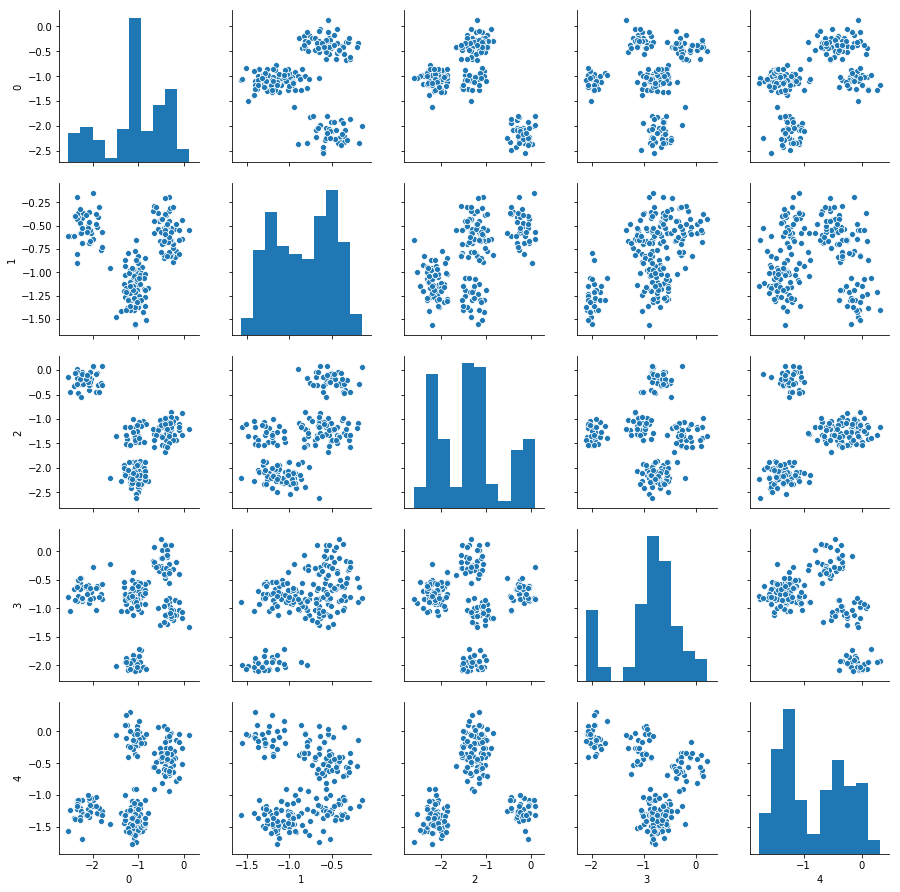

In [6]:
key = (0.7, 0.6, 0.9)
repeat_num = 3
Y1 = SAN_q[key][repeat_num]['Y']
t1 = pd.DataFrame(Y1)  # Create a Pandas DataFrame to plot scatter plots and Histogram of Y
P1 = SAN_q[key][repeat_num]['P']
GT1 = SAN_q[key][repeat_num]['GT']
sns.pairplot(t1)
plt.show()

In [ ]:
# P2 = SAN_q[(0.7, 0.9, 0.1)][1]['P']
# GT2 = SAN_q[(0.7, 0.9, 0.1)][1]['GT']
# Gp2 = nx.from_numpy_array(P2)
# labels_nx_org = {}
# for i in range(N):
#     labels_nx_org[i] = i
    

# # plt.figure(figsize=(15, 7.5))
# pos_org = nx.kamada_kawai_layout(Gp2)

# nx.draw_networkx(G=Gp2, pos=pos_org, nodelist=list(range(0, N)),
#                  labels=labels_nx_org, alpha=0.7,
#                  width=.3, node_color=['g', 'g', 'g', 'g',
#                                        'r', 'r', 'r', 'r', 'r',
#                                        'b', 'b', 'b', 'b', 'b', 'b'], node_size=200)
# plt.title("setting: (0.7, 0.9, 0.1)")
# plt.show()

In [ ]:
def flat_ground_truth(ground_truth):
    k = 0
    labels_true, labels_true_indices = [], []
    for v in ground_truth:
        for vv in v:
            labels_true.append(int(k))
            labels_true_indices.append(vv)
        k += 1
        
    return labels_true, labels_true_indices

### Compute PCA 

In [7]:
pca = PCA(n_components=2)
Y_r1 = pca.fit(Y1).transform(Y1)
GT = SAN_q[key][repeat_num]['GT']

In [8]:
GT = SAN_q[key][repeat_num]['GT']
labels = []
k = 0
for v in GT:
    labels += [int(k) for vv in range(v)]
    k += 1

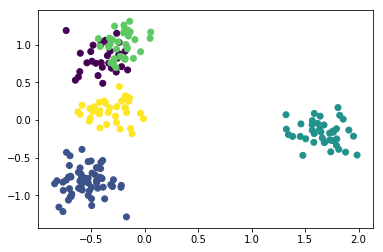

In [9]:
plt.figure()
lw = 2
plt.scatter(Y_r1[:, 0], Y_r1[:, 1], c=labels)
plt.show()

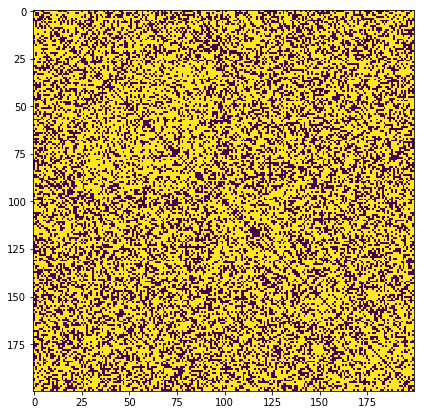

In [10]:
fig = plt.figure(figsize=(7, 7))
plt.imshow(P1)
plt.show()

### Compute PCA - With noisy features

In [11]:
Y1n = SAN_q[key][repeat_num]['Yn']
pca = PCA(n_components=2)
Yn_r1 = pca.fit(Y1n).transform(Y1n)

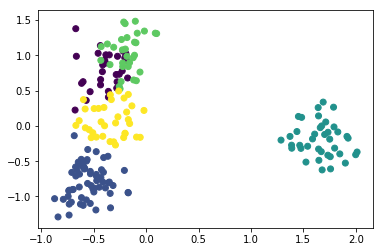

In [12]:
plt.figure()
lw = 2
target_names = list(range(V))

plt.scatter(Yn_r1[:, 0], Yn_r1[:, 1], c=labels)
plt.show()

In [13]:
Y1.shape, Y1n.shape

((200, 5), (200, 7))

### Draw the coresponding P

### Categorical Case

In [14]:
with open(os.path.join('../data', 'SC(200, 5, 5).pickle'), 'rb') as fp:
    SAN_c = pickle.load(fp)

In [15]:
for k, v in SAN_c.items():
    print(k)

(0.7, 0.3, 0.7)
(0.7, 0.3, 0.9)
(0.7, 0.6, 0.7)
(0.7, 0.6, 0.9)
(0.9, 0.3, 0.7)
(0.9, 0.3, 0.9)
(0.9, 0.6, 0.7)
(0.9, 0.6, 0.9)


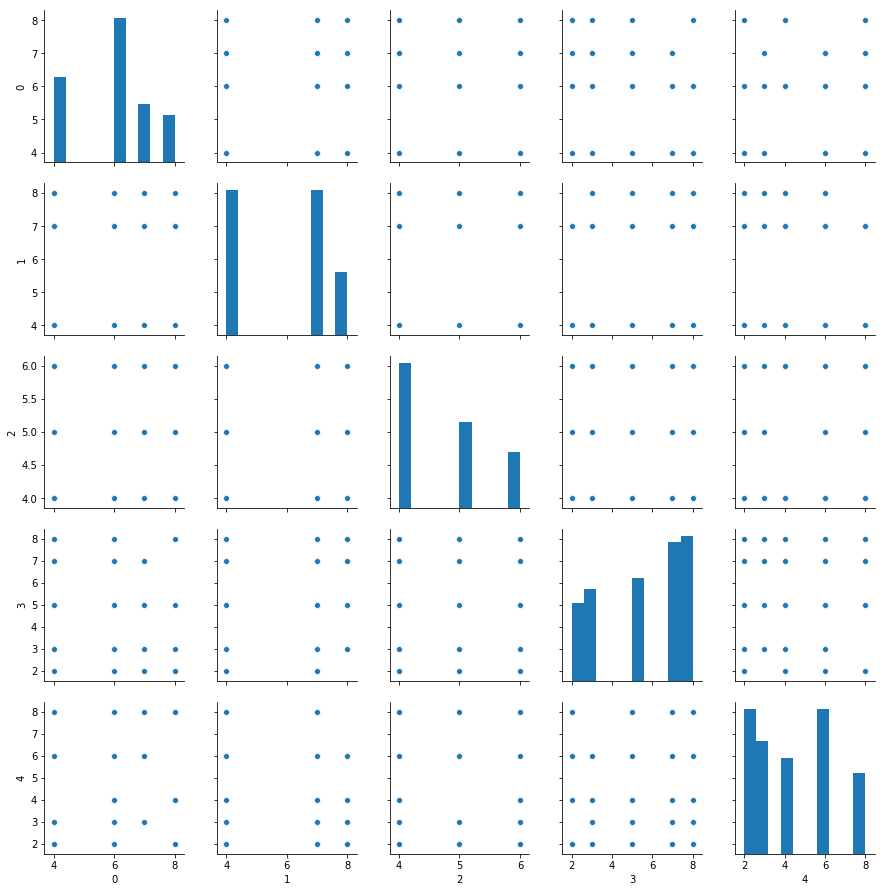

In [16]:
key = (0.7, 0.3, 0.9)
Y1c = SAN_c[key][1]['Y']
P1c = SAN_c[key][1]['P']
GT = SAN_c[key][1]['GT']
t1c = pd.DataFrame(Y1c)  # Create a Pandas DataFrame to plot scatter plots and Histogram of Y
sns.pairplot(t1c)
plt.show()

### Compute PCA 

In [17]:
pca = PCA(n_components=2)
Y_r1c = pca.fit(Y1c).transform(Y1c)

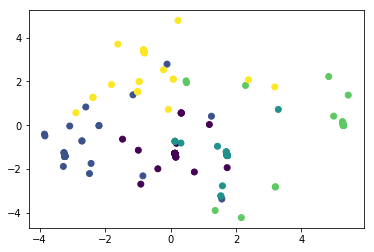

In [18]:
labels = []
k = 0
for v in GT:
    labels += [int(k) for vv in range(v)]
    k += 1
plt.figure()
lw = 2
plt.scatter(Y_r1c[:, 0], Y_r1c[:, 1], c=labels)
plt.show()

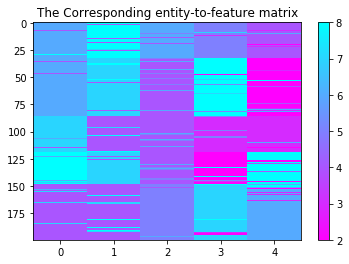

In [19]:
# LOAD Entity-to-feature matrix

plt.imshow(Y1c,  interpolation='None', aspect='auto', cmap='cool_r')
plt.title("The Corresponding entity-to-feature matrix")
plt.colorbar()
plt.show()


In [20]:
for k, v in SAN_c.items():
    if k == (0.9, 0.1, 0.9):
        for kk, vv in v.items():
            print("GT:")
            print(vv['GT'])

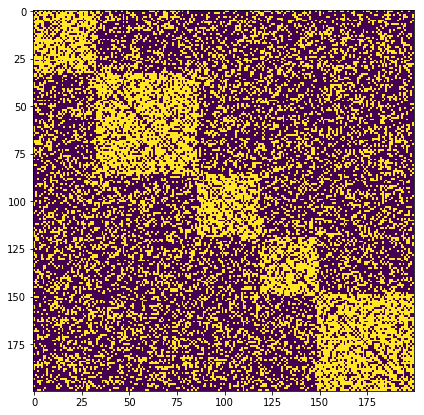

In [21]:
fig = plt.figure(figsize=(7, 7))
plt.imshow(P1c)
plt.show()

### Mixed Case

In [22]:
with open(os.path.join('../data', 'SM(200, 5, 5).pickle'), 'rb') as fp:
    SAN_m = pickle.load(fp)

In [23]:
for k, v in SAN_m.items():
    print(k)

(0.7, 0.3, 0.7)
(0.7, 0.3, 0.9)
(0.7, 0.6, 0.7)
(0.7, 0.6, 0.9)
(0.9, 0.3, 0.7)
(0.9, 0.3, 0.9)
(0.9, 0.6, 0.7)
(0.9, 0.6, 0.9)


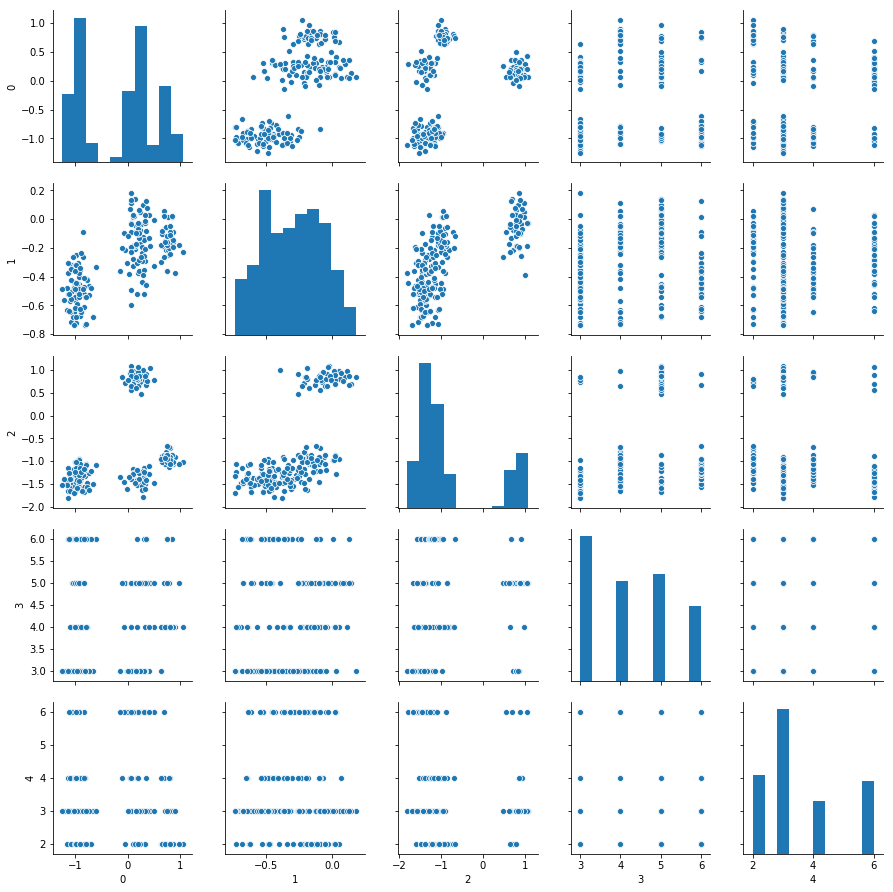

In [25]:
key = (0.9, 0.3, 0.7)
Y1m = SAN_m[key][1]['Y']
P1m = SAN_m[key][1]['P']
Yn1m = SAN_m[key][1]['Yn']
GT = SAN_m[key][1]['GT']
t1m = pd.DataFrame(Y1m)  # Create a Pandas DataFrame to plot scatter plots and Histogram of Y
sns.pairplot(t1m)
plt.show()

In [32]:
Y1m[2, :]

array([ 0.24, -0.18, -1.39,  3.  ,  6.  ])

### Compute PCA 

In [33]:
pca = PCA(n_components=2)
Y_r1m = pca.fit(Y1m).transform(Y1m)

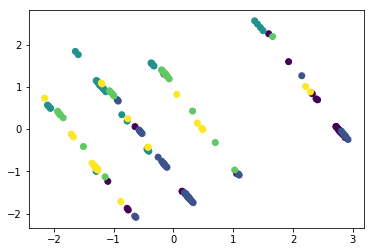

In [34]:
labels = []
k = 0
for v in GT:
    labels += [int(k) for vv in range(v)]
    k += 1
plt.figure()
lw = 2
plt.scatter(Y_r1m[:, 0], Y_r1m[:, 1], c=labels)
plt.show()

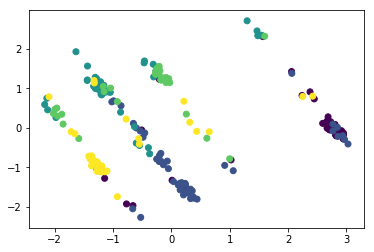

In [35]:
Yn_r1m = pca.fit(Yn1m).transform(Yn1m)
labels = []
k = 0
for v in GT:
    labels += [int(k) for vv in range(v)]
    k += 1
plt.figure()
lw = 2
plt.scatter(Yn_r1m[:, 0], Yn_r1m[:, 1], c=labels)
plt.show()

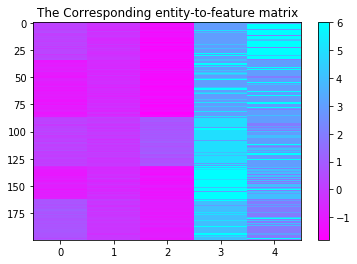

In [36]:
# LOAD Entity-to-feature matrix

plt.imshow(Y1m,  interpolation='None', aspect='auto', cmap='cool_r')
plt.title("The Corresponding entity-to-feature matrix")
plt.colorbar()
plt.show()


In [42]:
for k, v in SAN_m.items():
    if k == (0.9, 0.1, 0.9):
        for kk, vv in v.items():
            print("GT:")
            print(vv['GT'])

In [40]:
Y1m.shape, Yn1m.shape

((200, 5), (200, 8))